# Importing Libraries

In [29]:
import os
import random
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [30]:
# Path to the dataset and annotation directories
dataset_dir = r"C:\objectlocalisation\dataset"
annotations_dir = r"C:\objectlocalisation\annotations"

#  Function to parse XML annotation file and extract bounding box coordinates

In [35]:

def parse_annotation(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    objects = []
    for obj in root.findall('object'):
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)
        objects.append((xmin, ymin, xmax, ymax))
    return objects

#  Function to plot image with annotations

In [36]:
def plot_image_with_annotations(image, objects, category):
    fig, ax = plt.subplots(1)
    ax.imshow(image)
    for xmin, ymin, xmax, ymax in objects:
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    ax.set_title(category)  # Set category as title
    plt.show()


# Function to calculate IoU between two bounding boxes

In [37]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calculate intersection coordinates
    x_intersect = max(x1, x2)
    y_intersect = max(y1, y2)
    x_intersect_end = min(x1 + w1, x2 + w2)
    y_intersect_end = min(y1 + h1, y2 + h2)

    # Calculate intersection area
    intersect_width = max(0, x_intersect_end - x_intersect)
    intersect_height = max(0, y_intersect_end - y_intersect)
    intersect_area = intersect_width * intersect_height

    # Calculate union area
    union_area = w1 * h1 + w2 * h2 - intersect_area

    # Calculate IoU
    iou = intersect_area / union_area if union_area > 0 else 0
    overlap_percentage = (intersect_area / min(w1 * h1, w2 * h2)) * 100 if union_area > 0 else 0
    return iou,overlap_percentage

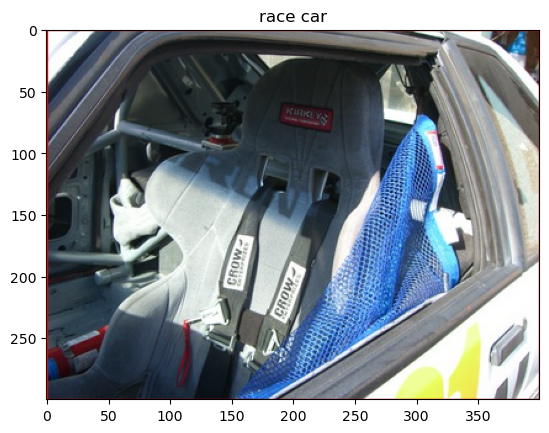

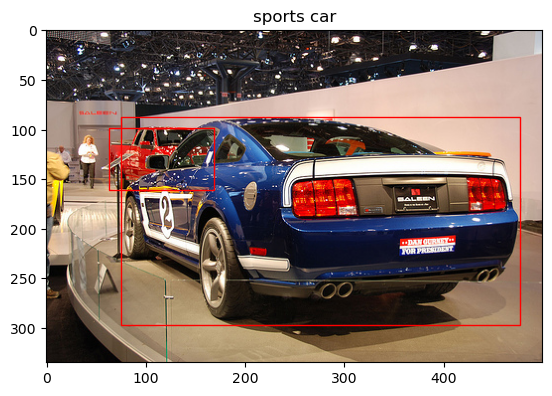

IoU between bounding boxes 1 and 2: 0.1760224510971372
Overlap Percentage: 92.89940828402366


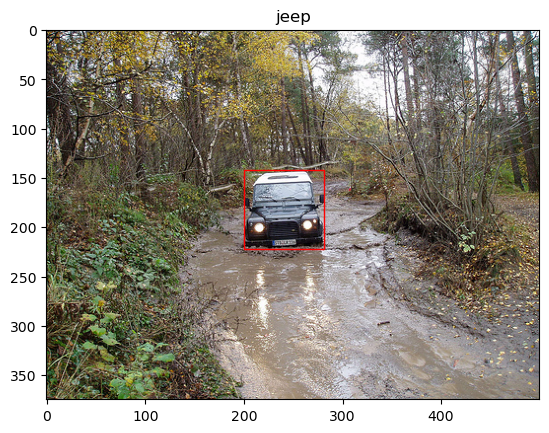

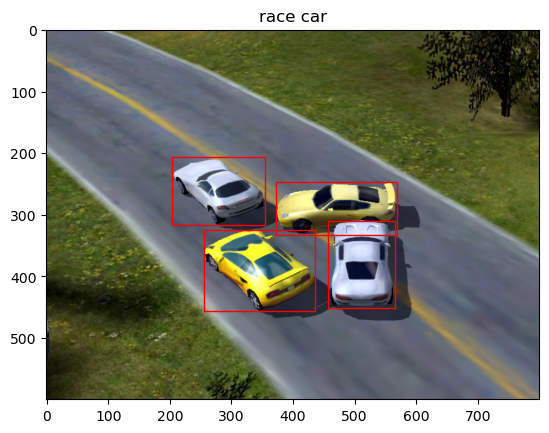

IoU between bounding boxes 1 and 2: 0.26228557654094975
Overlap Percentage: 42.56968235841475
IoU between bounding boxes 2 and 3: 0.20625135107004747
Overlap Percentage: 45.927972900695316
IoU between bounding boxes 3 and 4: 0.06292484989964346
Overlap Percentage: 19.367088607594937


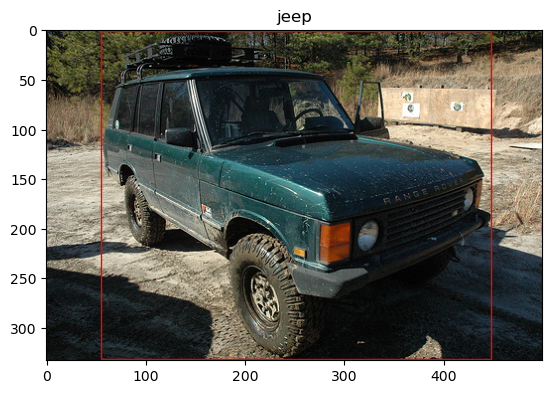

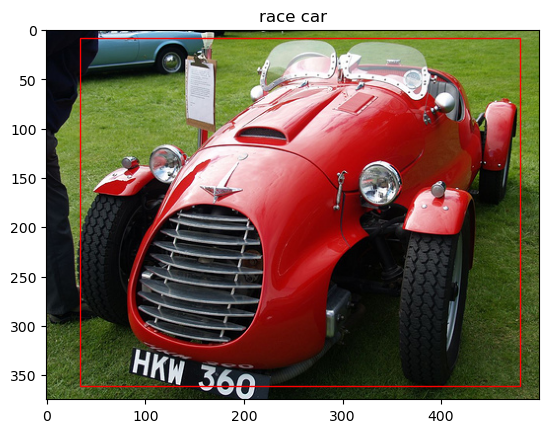

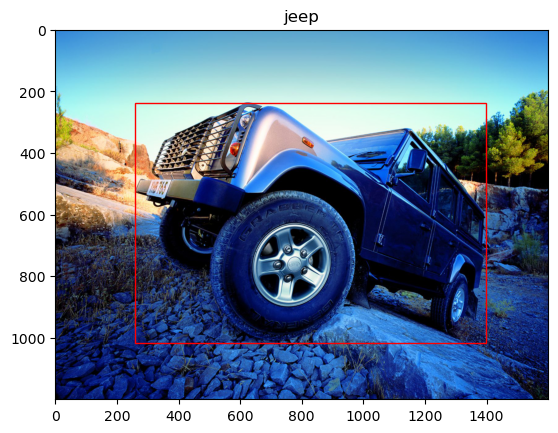

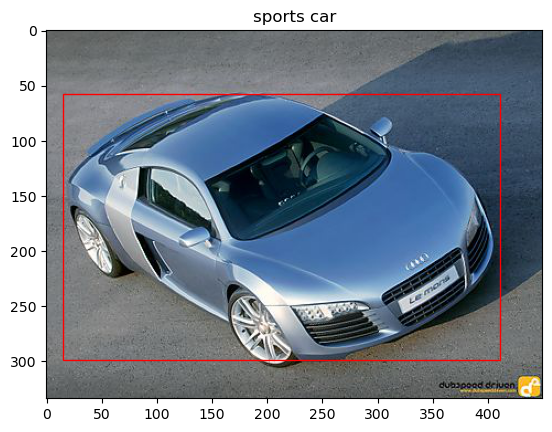

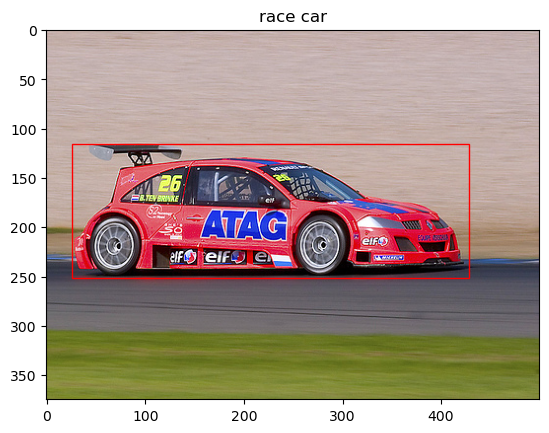

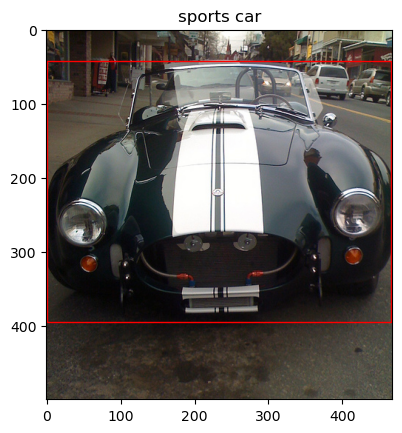

In [40]:
# Selecting three categories
categories = ['jeep', 'race car', 'sports car']

# Collect 10 random annotations and their corresponding images
annotations_images = []
for category in categories:
    category_dataset_dir = os.path.join(dataset_dir, category)
    category_annotations_dir = os.path.join(annotations_dir, category)
    
    annotation_files = os.listdir(category_annotations_dir)
    random.shuffle(annotation_files)
    selected_annotations = annotation_files[:10]  # Selecting 10 random annotation files
    for annotation_file in selected_annotations:
        # Load the annotation file
        annotation_path = os.path.join(category_annotations_dir, annotation_file)
        
        # Load the corresponding image file
        image_file = annotation_file.split('.')[0] + '.JPEG'
        image_path = os.path.join(category_dataset_dir, image_file)
        
        # Check if the corresponding image file exists
        if os.path.exists(image_path):
            # Append annotation and image pair
            annotations_images.append((annotation_path, image_path))

# Shuffle the annotations and images
random.shuffle(annotations_images)

# Print only the first 10 samples with category names as titles
for i in range(10):
    annotation_path, image_path = annotations_images[i]
    category = os.path.basename(os.path.dirname(annotation_path))  # Extract category from annotation path
    
    # Load the image
    image = Image.open(image_path)
    
    # Parse the annotation file
    objects = parse_annotation(annotation_path)
    
    # Plot image with annotations and category as title
    plot_image_with_annotations(image, objects, category)
    
    # Calculate and print IoU for adjacent bounding boxes
    for j in range(len(objects) - 1):
        iou,overlap_percentage = calculate_iou(objects[j], objects[j + 1])
        print(f"IoU between bounding boxes {j + 1} and {j + 2}: {iou}") 
        print("Overlap Percentage:", overlap_percentage)   

